Kandidater: 10113 10058 10041
## Introduksjon:

I dette prosjektet skal vi enkelt og greit studere vippingen til en båt. Dette er kanskje en grei beskrivelse av prosjektet, men som kanskje ikke er veldig givende for en leser. For å gå litt mer i dybden, så skal vi i dette prosjektet bruke numeriske metoder for å løse de grunnleggende ligninger i fysikken, nemlig Newtons 2. lov; $\Sigma F = m \vec{a}$ og $\Sigma \tau = I \ddot{\theta}$.

Dette skal vi gjøre ved hjelp av Eulers metode, og den klassiske Runge-Kutta metoden av orden 4. Vi skal studere alt fra enkle systemer, hvor en båt ligger å vugger frem og tilbake, som en konsekvens av oppdriftskraft og tyngdekraft, til mer realistiske systemer hvor både vind, friksjon og løs last på dekk har en innvirkning på systemet.

In [1]:
# Importering av diverse bibloteker og definering av konstanter

import numpy as np
import matplotlib.pyplot as plt

sigma0 = 1000           # Massetetthet til vann [kg/m^2]
sigma = 500             # Massetetthet til tverrsnitt av båten [kg/m^2]
R = 10                  # Radius til skipets tverrsnitt
H = 4/(3*np.pi)*R       # Tverrsnittet til skipets tyngdepunkt
m = 500/2 * R**2 *np.pi # Masse til skipet
g = 9.81                # Tyngdeakselerasjenen ved Sveriges havnivå

theta_0 = np.radians(20)# Startvinkel i radianer
omega_0 = 0             # Initiell vinkelhastighet i rad/sek
t0 = 0                  # Starttid i s
t_end = 20              # Slutttid i s



# Oppgave 1
I oppgave 1 modellerer vi skipet med noen ganske store forenklinger. Vi ser kun på kraft fra tyngden og oppdrift, samt dreiemoment fra oppdrift (gravitasjonskraften bidrar ikke til noe dreiemoment om tyngdesenteret). I første omgang antar vi at mengden fortrengt vann er konstant. Vi utnytter Eulers metode og den fjerdeordens Runge Kutta metoden for å løse differensial-bevegelseslikningene som følger med systemet vårt.
## 1a)
I oppgave 1a ønsker vi å finne sektorvinkelen til båten, en likning som ikke lar seg løse analytisk. Vi anvender derfor Newtons metode.

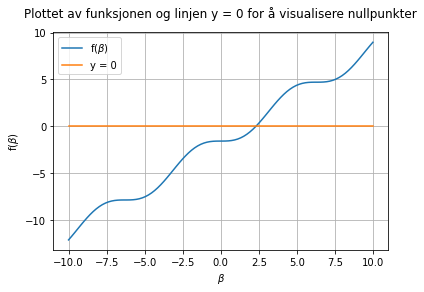

In [2]:
# Oppgave 1a
def f(beta): 
    # Funksjon vi ønsker å finne nullpunkter til
    return beta - np.sin(beta) - np.pi*sigma/sigma0

def plot_f():
    beta = np.linspace(-10,10,100)           # Diskrete beta-verdier

    # Plotting
    plt.plot(beta,f(beta), label=r'f($\beta$)')
    plt.plot(beta,np.zeros(100), label=r'y = 0')
    plt.title(r'Plottet av funksjonen og linjen y = 0 for å visualisere nullpunkter', pad=15)
    plt.xlabel(r'$\beta$')
    plt.ylabel(r'f($\beta$)')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_f()   

Fra plottet ser vi at funksjonen har et nullpunkt rundt $\beta$ = 2.5.
<br>
Funksjonen vår $f(\beta) = \beta - sin(\beta) - \pi \frac{\sigma_w}{\sigma} \in C^{\infty}[-\infty, \infty]$  har en derivert:
$$
\frac{df}{d\beta} = 1 - cos(\beta)
$$
<br>
Som åpenbart er $\geq 0$ for alle $\beta \in \mathbb{R}$
<br>
Theorem 1 i utdelt notat (https://www.math.ntnu.no/emner/TMA4320/2022v/pdf/NonLinearEquations.pdf) tilsier at den monotone funksjonen vår har en entydig løsning.
<br>
Vi har brukt Newtons metode for dens elegans og simplisitet, men vi kunne fint utnyttet noe annet som fikspunktiterasjon.

In [3]:
# Oppgave 1a

# Finner sektorvinkelen beta i likevekt ved hjelp av Newtons metode

def df(beta):     
    # Deriverte av funksjonen
    return 1-np.cos(beta)

def newtonMethod(x0, tol, f, df):
    '''
    Itererer til et punkt (forhåpentligvis) litt nærmere løsningen
    til endringen mellom punktene er mindre enn en gitt toleranse
    '''
    x = x0
    xold = x
    xnext = 0
    while abs(xnext-xold) > tol:
        xnext = x - f(x) / df(x)
        xold = x
        x = xnext
    return x

print(f'Sektorvinkel ved liketvekt gitt betingelser: {newtonMethod(2, 1.e-6, f, df):.5f} radianer' )

Sektorvinkel ved liketvekt gitt betingelser: 2.30988 radianer


## Oppgave 1b)

In [4]:
# Oppgave 1b
# Bergener høyden over vannlinja (vannlinje y=0) til: metasenter (yM), skipets massesenter (yC), skipets dypsete punkt (yD) og angrepspunktet
# til oppdriftskraften (yB)

# Ved likevekt:

beta = newtonMethod(2, 1.e-5, f, df)     # Sektorvinkelen med newtons metode

yM0 = R*np.cos(beta/2)         # Høyden til metasenteret over havoverflaten
yC0 = yM0 - H                  # Høyden til massesenteret over havoverflaten
yMB0 = R * 4*(np.sin(beta/2))**3 / (3*(beta - np.sin(beta)))      # Avstand mellom metasenter og oppdriftssenter
yB0 = yM0 - yMB0               # Avstand fra oppdriftssenter til havoverflaten
yD = yM0 - R                   # Avstand fra tverrsnittets laveste punkt til havoverflaten

## Oppgave 1c)


For å finne vinkelutslaget som funksjon av tid, $\theta(t)$ må vi løse den andreordens differensiallikningen:
$$
\frac{d\omega}{dt} = \frac{d\theta^{2}}{dt^{2}} = \frac{\sum\tau (\theta)}{I_C}
$$
<br>
Der $I_C$ er treghetsmomentet til båtens tverrsnitt om massesenterets rotasjonsakse og $\tau$ er tilsvarende dreiemoment. Det eneste dreiemomentet vi ser på i oppgave 1 er fra den vinkelavhengige oppdriften, $\tau_{B} = F_B \cdot H sin(\theta)$.
<br>
Der $H$ er avstanden mellom båtens tygndepunkt og metasenter, og $F_b$ er oppdriftskraften.
<br>
<br>
Oppdriftskraften er fra Arkimedes prinsipp lik tyngden til vannet forskjøvet av båten. Denne mengden er konstant (i første omgang) og lik (motsatt rettet) tyngden til båten fra båtens geometri og Newtons første lov. Av symmetrimessige grunner vil kraften alltid virke på en akse under båtens metasenter.
<br>
<br>
Det følger
$$
\frac{d\theta^{2}}{dt^{2}} = \frac{\sum\tau}{I_0} = \frac{\tau_{B}}{I_C} = \frac{-F_B \cdot H sin(\theta)}{I_C} = \frac{-mgH \cdot sin(\theta)}{I_C}
$$

Der $m$ er skipets masse og $g$ er tyngdeakselerasjonen i systemet. Likningen kan omskrives til de to førsteordens difflikningene:

$
\begin{align}
\frac{d\theta}{dt} = \omega(t) = f_1(t,\omega(t))
\end{align}
$

$
\begin{align}
\frac{d\omega}{dt} = \frac{-mgH \cdot sin(\theta(t))}{I_C} = f_2(t,\theta(t))
\end{align}
$


Ved hjelp av vektoren $\overrightarrow{\omega}(t) = [\theta(t), \omega(t)]^{T}$ og vektorfunksjonen $\overrightarrow{f}(t,\overrightarrow{\omega}) = [f_1(t,\theta), f_2(t, \omega)]^{T}$ kan vi uttrykke likningssettet vårt som en vektorlikning:

$$
\frac{d\overrightarrow{\omega}}{dt} = \overrightarrow{f}(t,\overrightarrow{\omega}) = [\omega, \frac{-mgH \cdot  sin(\theta)}{I_C}]^{T} = [\omega, \frac{-2gH \cdot sin(\theta)}{R^{2} \cdot (1-\frac{32}{9\pi^{2}})}]^{T}
$$

Der $R$ er radiusen til tverrsnittet av båten, og hvor vi har utnyttet $ I_C = \frac{mR^{2}}{2} \cdot (1-\frac{32}{9\pi^{2}}) $ i siste overgang.
<br>
<br> I resten av denne teksten vil vi bruke $\alpha$ til å referere til $\overrightarrow{\omega}$ for å unngå forveksling av $\omega$ og $\overrightarrow{\omega}$ i koden.

## Oppgave 1d)
Vi løser systemet med differensiallikninger numerisk ved hjelp av Eulers metode. Det er ikke godt å si hva som er adekvat steglengde, så vi implenenterer en funksjon, $\textit{step_size}$, som løser problemet med minkende steglengde, og avslutter når vi er fornøyde med løsningen. Vi sier oss fornøyde når forskjellen i avstand fra likevekt mellom topp- og bunnbunkt er mindre enn en gitt toleranse (0.001 i dette tilfelle). 

In [5]:
# Oppgave 1d

# Likningssystemet fra 1c)
def f(t,alpha):
    f1 = alpha[1]                                                  # d_theta/dt
    f2 = -2*g*H*np.sin(alpha[0]) / (R**2 * (1-32/9/np.pi**2))      # d_omega/dt

    alpha_next = np.array([f1,f2])
    return alpha_next

In [6]:
def euler(f, t, y, h):
    # One step of the Euler method
    y_next = y + h*f(t, y)
    return y_next

In [7]:
def ode_solver(f, t0, t_end, y0, h, method=euler):
    '''
    Generic solver for ODEs
        y' = f(x,y), y(a)=y0
    Input: f, the integration interval x0 and xend, 
           the stepsize h and the method of choice.  
       
    Output: Arrays with the x- and the corresponding y-values. 
    
    (Kode i hovedsak knabbet fra utdelt notat "ODE.ipynb")
    '''

    #Initializing:
    y_num = np.array(y0)    # Array for the solution y 
    t_num = np.array([t0])    # Array for the x-values

    # Main loop
    while t_num[-1] < t_end:    
        if (t_num[-1]+h > t_end):
            h = t_end - t_num[-1]
        
        yn = method(f, t_num[-1], y_num[-1], h)         # Do one step by the method of choice
        tn = t_num[-1]+h
        
        # Extend the arrays for x and y
        y_num = np.concatenate((y_num, np.array([yn])))
        t_num = np.append(t_num,tn)
        
    return t_num, y_num

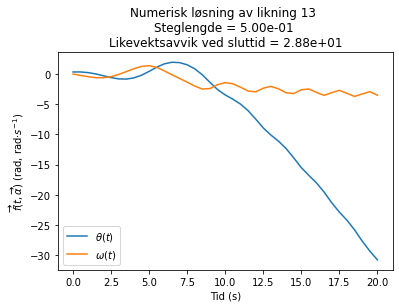

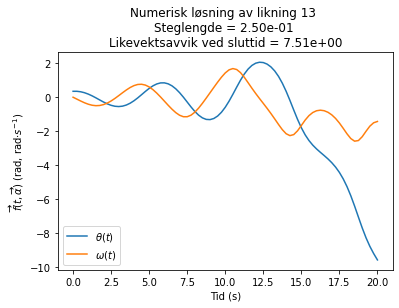

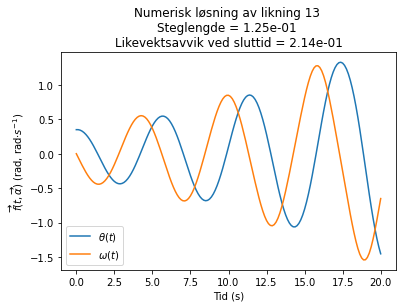

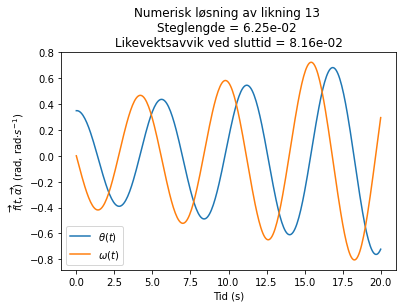

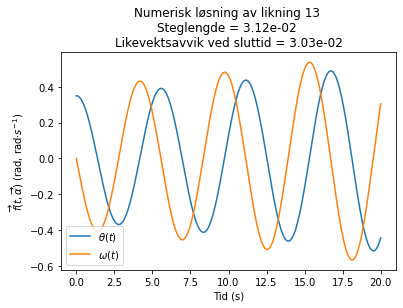

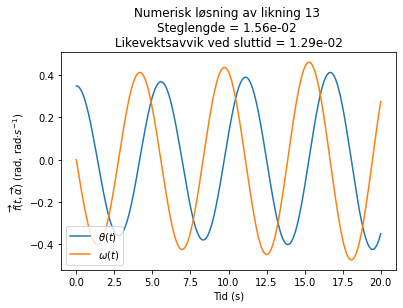

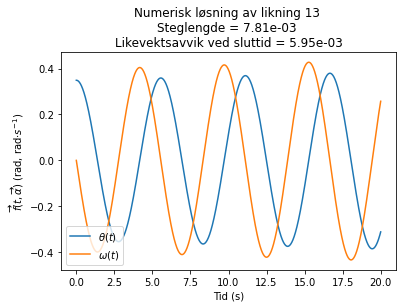

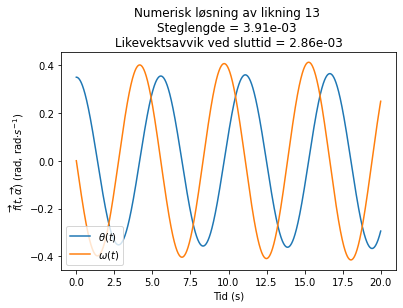

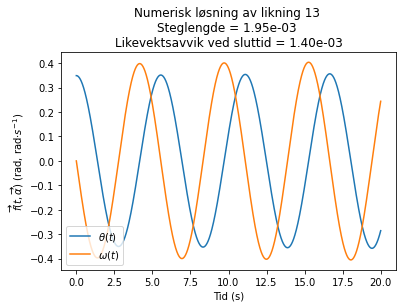

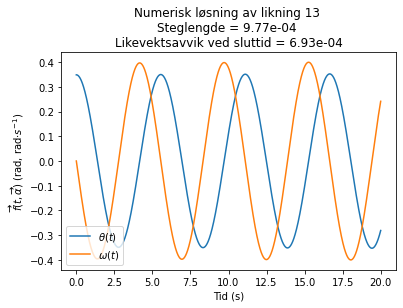

In [8]:
def step_size(f, t0, t_end, init_value, tol, method=euler):
    '''
    Halverer steglengde til vi er fornøyde med forskjellen
    i bunnpunkt og toppunkt i svingningene våre.
    Funksjonene har ingen drivende eller dempende kraft, så de harmoniske løsningene
    burde være konstante. Likevel øker amplituden til utsvingene
    med tiden på grunn av feilforplatning i Eulers metode.
    Denne økningen er proporsjonal med steglengden.
    
    Vi halverer altså steglengden til denne økningen i amplitide blir
    mindre enn en gitt toleranse.
    '''
    h = 1        # Starter med høy steglengde
    t, alpha = ode_solver(f, t0, t_end, init_value, h, method)   # Første mumeriske approksimasjon (siden det ikke finnes dowhile i python...)
    deviation = abs(np.amin(alpha)+np.amax(alpha))          # Avvik fra likevektsamplituden
    
    while (deviation>tol):
        h = h/2           # Dobler antall steg for hver iterasjon
        t, alpha = ode_solver(f, t0, t_end, init_value, h, method)
        deviation = abs(np.amin(alpha)+np.amax(alpha))  # Bruker forskjellen mellom høyeste og minste punkt som mål på avviket
        # Plotting...
        plt.plot(t,alpha);
        plt.xlabel('Tid (s)')
        plt.ylabel(r'$\overrightarrow{f}(t,\overrightarrow{\alpha}$) (rad, rad$\cdot s^{-1}$)')
        plt.title(f'Numerisk løsning av likning 13 \nSteglengde = {h:.2e} \nLikevektsavvik ved sluttid = {deviation:.2e}')
        plt.legend([r'$\theta(t)$',r'$\omega(t)$'],loc=3);
        plt.show()
    return h

alpha_start = np.array([[theta_0, omega_0]])   # Vektor med initial verdiene til theta og omega, omdøpt alpha
step_tolerance = 0.001             # Ønsker avvik fra likevekts amplitude på tidsintervallet < 0.001
h = step_size(f,t0,t_end,alpha_start,step_tolerance)  # Implementerer den nye, adekvate steglengden



Vi ser tydelig fra figurene at amplituden stabiliserer seg når vi øker steglengden. For ordens skyld plotter vi amplitude-avviket som funksjon av steglengden.

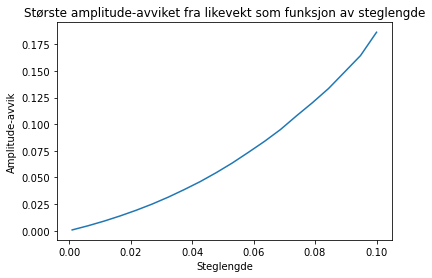

In [9]:
# Plotter avviket som funksjon av steglengde
n = 20      # antall datapunkter
step_sizes = np.linspace(0.001,0.1,n)  # liste med n steglengder fra 0.001 til 0.1

def deviation(step_size):
    t, alpha = ode_solver(f, t0, t_end, alpha_start, step_size)
    deviation = abs(np.amin(alpha)+np.amax(alpha))
    return deviation

deviation_array = np.zeros(n)
for i in range(n):
    deviation_array[i] = deviation(step_sizes[i])
    
plt.plot(step_sizes,deviation_array)
plt.title('Største amplitude-avviket fra likevekt som funksjon av steglengde', )
plt.xlabel('Steglengde')
plt.ylabel('Amplitude-avvik')
plt.show()

Som åpenbart vokser med steglengden. Her ser vi at å bruke en steglengde på 0.01, som blir gjort videre i oppgavene, ikke er så kjempe urimelig, da dette gir et relativt lavt avvik, men fører ikke til en enorm kjørtid på koden.

## Oppgave 1e)
Vi ser på likningssystemet vårt for små vinklerutslag, der $sin(\theta)$ ≈ $\theta$. Men hvor god er egentlig denne tilnæmelsen for større vinkler?

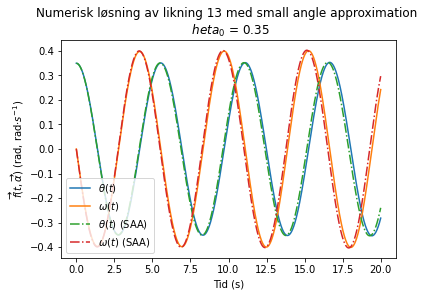

Største forskjell med/uten SSA: 6.9e-02


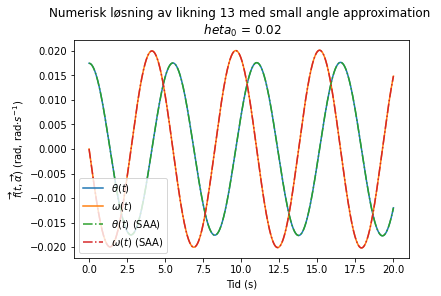

Største forskjell med/uten SSA: 8.6e-06


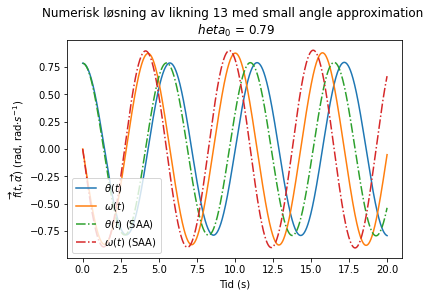

Største forskjell med/uten SSA: 7.5e-01


In [10]:
# 1e

# Likningssystemet fra 1c) MED small angle approximation, sin(x)≈x
def f_SAA(t,alpha):
    f1 = alpha[1]                                                  # d_theta/dt
    f2 = -2*g*H*alpha[0] / (R**2 * (1-32/9/np.pi**2))              # d_omega/dt

    alpha_next = np.array([f1,f2])
    return alpha_next

alpha_start = np.array([[theta_0, omega_0]])
t, alpha = ode_solver(f, t0, t_end, alpha_start, h)
t, alpha_SAA = ode_solver(f_SAA, t0, t_end, alpha_start, h)

for angle in [20*np.pi/180, 1*np.pi/180, 45*np.pi/180]:
    init_values = np.array([[angle,omega_0]])
    t, alpha = ode_solver(f, t0, t_end, init_values, h)
    t, alpha_SAA = ode_solver(f_SAA, t0, t_end, init_values, h)
    error = np.amax(abs(alpha-alpha_SAA))
    plt.plot(t,alpha);
    plt.plot(t,alpha_SAA,"-.")
    plt.xlabel('Tid (s)')
    plt.ylabel(r'$\overrightarrow{f}(t,\overrightarrow{\alpha}$) (rad, rad$\cdot s^{-1}$)')
    plt.title(f'Numerisk løsning av likning 13 med small angle approximation \n $\theta_{0}$ = {angle:.2f}')
    plt.legend([r'$\theta(t)$',r'$\omega(t)$',r'$\theta(t)$ (SAA)',r'$\omega(t)$ (SAA)'],loc=3);
    plt.show()
    print(f'Største forskjell med/uten SSA: {error:.1e}')


Ser at den største forskjellen mellom f og f_SAA med startvinkel = $1^{o}$ har størrelsesorden 1.e-6, som definitivt tilsier at approksimasjonen er mer enn adekvat for de fleste formål.
<br>
Når vi beveger oss opp i gradeskalaen til $20^{o}$ derimot, ser vi et max avvik på nesten 0.07, som ikke er like neglisjerbart.
<br>
for morroskyld plottet vi også løsningen ved $45^{o}$, som forventet er en elendig tilnærming.
Fra plottet ser det også ut som at denne feilen øker med tiden.
<br>
<br>
For å forstå hvorfor, plotter vi sammenhengen mellom sin(x) og x.

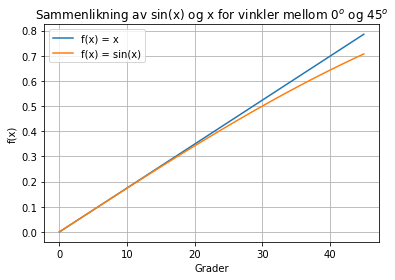

In [11]:
# Plotter sin(x) sammen med x for å se gyldighet til approximasjon sin(x) ≈ x
degrees = np.linspace(0,45,100)
plt.plot(degrees,degrees/180*np.pi,label='f(x) = x')
plt.plot(degrees,np.sin(degrees/180*np.pi), label = 'f(x) = sin(x)')
plt.title('Sammenlikning av sin(x) og x for vinkler mellom $0^{o}$ og $45^{o}$')
plt.legend()
plt.grid(True)
plt.xlabel('Grader')
plt.ylabel('f(x)')
plt.show()

Vi ser at tilnærmingen begynner å divergere rundt $20^{o}$, som passer godt med resultatet vårt.

## Oppgave 1f)
Vi implementerer ganske enkelt den klassiske fjerde ordens Runge Kutta metoden.

In [12]:
# 1f, implementerer RK4
def RK4(f,x,y,h):
    # Ett steg av klassisk Runge Kutta metoden.

    k1 = f(x,y)
    k2 = f(x + 1/2 * h, y + 1/2 * h * k1)
    k3 = f(x + 1/2 * h, y + 1/2 * h * k2)
    k4 = f(x +   1 * h, y +   1 * h * k3)
    
    y_new = y + h/6*(k1 + 2*k2 + 2*k3 + k4)
    
    return y_new

## Oppgave 1g)

Ligning 10 er: 
$$-mgh \theta = I_c \ddot{\theta}$$

Ved å dele på $I_c$ på begge sider og deretter flytte over $\theta$ leddet, resulterer dette i:

$$\ddot{\theta} + \mu^2 \theta = 0$$

$$\mu^2 = \frac{m g h}{I_c}$$

Dette gir en karakteristisk ligning, med tilhørende generelle løsning:

$$r^2+\mu^2 = 0 \;\;\;\;\;\; r = \pm i \mu$$

$$\theta (t) = A \sin(\mu t) + B \cos(\mu t)$$

$$\theta (t) = A \sin(\sqrt{\frac{mgh}{I_c}} t) + B \cos(\sqrt{\frac{mgh}{I_c}} t)$$


For videre bruk i oppgave 1h) bruker vi de oppgitte initial betingelsene:

$$\theta (t = 0) = 0.01  rad \;\;\;\;\;\; \omega (t = 0) = \dot{\theta}(t = 0) = 0 rad/s$$

$$\theta (t = 0) = B = 0.01 rad$$

$$\omega (t = 0) = A = 0 rad/s$$

Dette gir oss den spesielle løsningen:

$$\theta (t) = 0.01 \; \cos(\sqrt{\frac{mgh}{I_c}} t) \;\;\;\;\;\;\;\;\; OBS: Enhet \; rad$$

## Oppgave 1h)
Vi sammenlikner Euler og Runge Kutta med den analytiske løsningen utledet i 1g). Runge Kutta gjør 4 funksjonsevalueringer per steg, så for å gjøre sammenlikningen mer rettferdig gjør vi derfor 4 ganger flere funksjonsevalueringer med Euler.

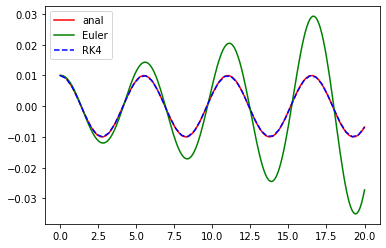

In [13]:
# Oppgave 1h
def analytisk(t):
    return 0.01*np.cos(np.sqrt(2*g*H/(R**2*(1-32/(9*np.pi**2))))*t)

t1 = np.linspace(t0,t_end,100)       # Diskretiserer tidsaksen
y1 = analytisk(t1)                   # Analytisk

theta_0 = 0.01
omega_0 = 0

w0 = np.array([[theta_0,omega_0]])
t2, y2 = ode_solver(f,t0,t_end,w0,h=0.1, method=euler)     # Euler
t3, y3 = ode_solver(f,t0,t_end,w0,h=0.1*4, method=RK4)       # Klassisk Runge Kutta

plt.plot(t1,y1,"r",label = "anal")
plt.plot(t2,y2[:,0],"g",label = "Euler")
plt.plot(t3,y3[:,0],"--b",label = "RK4")
plt.legend()
plt.show()

In [14]:
# Oppgave 1h
# Initial betingelser
theta_0 = 0.01
omega_0 = 0

x0 = 0
xend = 20
y0 = np.array([[theta_0,omega_0]])

#Lister for error ved ulike steglengder
err_t20_euler = []                         #Bruker liste istedefor np.array, da det er lettere å legge til elementer
err_t20_rk4   = []

#Eksakt løsning
µ = np.sqrt(2*g*H/(R**2*(1-32/(9*np.pi**2))))  #Se utledning 1g
eksakt_t20 = theta_0*np.sin(µ * 20)

#Steglengder
h0   = 0.001
hend = 2
hs   = np.linspace(h0,hend,2000)


#Ittererer gjennom alle steglengder, og regner ut feil ved t = 20
for h_val in hs:
    euler_t20 = ode_solver(f,x0,xend,y0,h_val,euler)[1][-1][0]  #Verdi for theta ved t = 20 Euler
    rk4_t20 = ode_solver(f,x0,xend,y0,h_val,RK4)[1][-1][0]      #Verdi for theta ved t = 20 RK4

    err_euler = np.abs(eksakt_t20 - euler_t20)
    err_rk4 = np.abs(eksakt_t20 - rk4_t20)
    
    err_t20_euler.append(err_euler)
    err_t20_rk4.append(err_rk4)
    

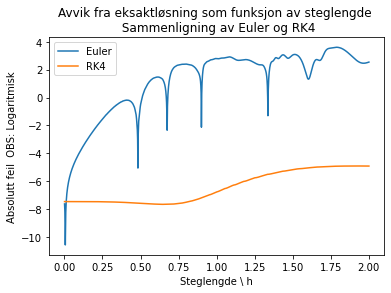

In [15]:
#Plotting
plt.figure()

plt.title("Avvik fra eksaktløsning som funksjon av steglengde \n Sammenligning av Euler og RK4")
plt.xlabel("Steglengde \ h")
plt.ylabel("Absolutt feil  OBS: Logaritmisk")

plt.plot(hs,np.log(err_t20_euler),label = "Euler")
plt.plot(hs,np.log(err_t20_rk4),label = "RK4")

plt.legend()
plt.show()


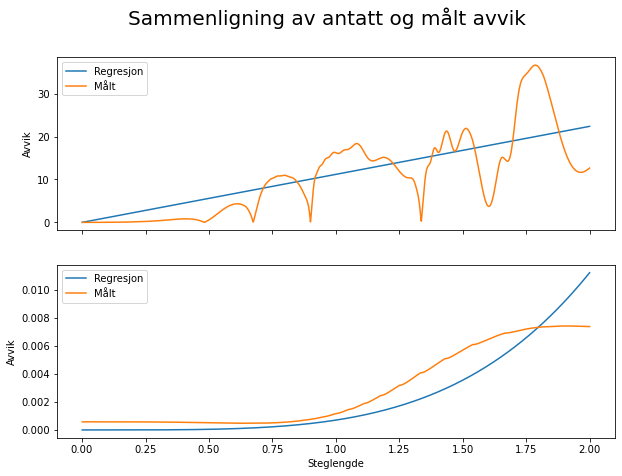

In [16]:
from scipy.optimize import curve_fit

def error_euler(x,a):
    return a*x

def error_rk4(x,a):
    return a*x**4

a_euler = curve_fit(error_euler,hs,err_t20_euler)[0]
a_rk4   = curve_fit(error_rk4,hs,err_t20_rk4)[0]

fig, (ax1,ax2) = plt.subplots(2,sharex = True, figsize = (10,7))

fig.suptitle("Sammenligning av antatt og målt avvik",size =20)

ax1.set_ylabel("Avvik")
ax2.set_ylabel("Avvik")
ax2.set_xlabel("Steglengde")

ax1.plot(hs,error_euler(hs,a_euler),label = "Regresjon")
ax1.plot(hs,err_t20_euler,label = "Målt")

ax2.plot(hs,error_rk4(hs,a_rk4),label = "Regresjon")
ax2.plot(hs,err_t20_rk4,label = "Målt")

ax1.legend()
ax2.legend()
plt.show()

Ovenfor har vi brukt scipy sin curve_fit for å lage en regresjon av hva vi forventer å få. Ettersom at Eulers metode og RK4 er henholdsvis orden 1 og orden 4 metoder, så forventer vi et avvik som følger $C h^{orden}$. Det er dette vi har gjort for å få kurvene vist over. Ettersom at det vil være mye støy, da vi sjekker avviket i det siste punktet, kan vi si at kurvene passer greit. Og vi ser denne forplantningen i avviket fra den eksakte løsningen.

# Oppgave 2

I oppgave 2 kommer vi til å se på litt mer avanserte systemer. Videre skal vi inkludere variasjon av massesenterets posisjon i x og y retning, krefter som følger av dette, skipslast, harmoniske krefter og ikke minst friksjon. Vi kommer til å bruke RK4 for å løse differensial ligningene fremover, da vi i oppgave 1 fikk se hvor godt egnet den er.  

## Oppgave 2a

Vi skal nå se på hvordan variasjon av fortrengt vann, fører til en bevegelse av massesenteret i y-retning. Det er ikke store forskjellen fra hva som ble gjort i oppgave 1, men vi må gjøre noen endringer. 

Vi må blant annet ta hensyn til at A (areal av fortrengt vann) ikke lenger er konstant. Et utrykk for A, som en funksjon av sektorvinkelen $\gamma$ er gitt ligning (6). Dette fører til at lignigning (12) og (13) blir koblede. For oppgave 2a ser vi bare på kreftene og dreiemomentet med opphav i tyngdekraft og oppdriftskraft.

$$A = \frac{1}{2} R^2 (\gamma - sin(\gamma)) \;\;\;\;;\;\;(6)$$


$$\gamma = 2 arccos[cos(\beta /2) - \frac{4 (1-cos(\theta))}{3 \pi} + \triangle y_C/R] \;\;\;\;;\;\; (5)$$
$$\triangle y_C = y_C - y_{C}^0 = y_C - R cos(\beta / 2) + \frac{4R}{3 \pi}$$


$$\implies \gamma = 2 arccos[cos(\beta /2) - \frac{4 (1-cos(\theta))}{3 \pi} + (y_C - R cos(\beta / 2) + \frac{4R}{3 \pi})/R]$$
$$= 2 arccos[cos(\beta /2) - \frac{4 (1-cos(\theta))}{3 \pi} + y_C/R -  cos(\beta / 2) + \frac{4}{3 \pi}] $$
$$= 2 arccos[y_C/R + \frac{4 cos(\theta)}{3 \pi}]$$

Dette får vi videre bruk for når vi skal regne ut kraftsummen og summen av dreiemoment.

$$\Sigma \textbf{F} = m \textbf{A} = m \frac{d^2 R}{d t^2} \;\;\;\;\;\; (12)$$
$$\Sigma \tau = I_C \frac{d^2 \theta}{d t^2} = I_C \frac{d\omega}{dt} \;\;\; (13)$$

$$F_G = - m g \; (y) \;\;\;\;\;\;\; (14a)$$

$$F_B = A \sigma_0 g \; (y) \;\;\;\;\;\; (14b)$$
$$\implies F_B = \frac{1}{2} R^2 (\gamma - sin(\gamma)) \sigma_0 g \; (y)$$

$$\tau_B = -F_B H sin(\theta) \;\; (15a)$$
$$\implies \tau_B = - \frac{1}{2} R^2 (\gamma - sin(\gamma)) \sigma_0 g H sin(\theta) $$

NB: Her har vi brukt at avstanden fra metasenter til massesenter er lik H. Dette er for å unngå at vi mikser denne distansen med h, som vi  benytter for steglengden.

Videre innsetting av (14a),(14b) og (15a) i (12) og (13) gir:

$$\Sigma F = F_G+F_B = - mg (y) + A \sigma_0 g(y) = m \frac{d^2 R}{d t^2}$$
$$\implies \frac{d^2 R}{d t^2} = g ( \frac{A \sigma_0}{m}-1) (y)$$
$$= g ( \frac{\gamma -sin(\gamma)}{\pi} \frac {\sigma_0}{\sigma_s} -1 ) (y)$$

Ettersom at vi i 2a bare ser på krefter så kan vi slløyfe det faktum at $\textbf{R}$ egentlig er en vektor (x,y). Dette kan vi gjøre da x vil være konstant, da det ikke virker noen krefter i x retning. Vi kan dermed si at:

$$\frac{d^2 y}{d t^2} = g ( \frac{\gamma -sin(\gamma)}{\pi} \frac {\sigma_0}{\sigma_s} -1 ) (y)$$

$$\Sigma \tau = \tau_B = - \frac{1}{2} R^2 (\gamma - sin(\gamma)) \sigma_0 g H sin(\theta) = I_C \frac{d^2 \theta}{d t^2} $$

$$\implies \frac{d^2 \theta}{d t^2} = - \frac{1}{I_C} \frac{1}{2} R^2 (\gamma - sin(\gamma)) \sigma_0 g H sin(\theta)$$
$$I_C = \frac{1}{2} m R^2 (1-\frac{32}{9 \pi^2})$$
$$\implies \frac{d^2 \theta}{d t^2} = - \frac{ 2 g H sin(\theta) (\gamma-sin(\gamma)) \sigma_0}{\pi \sigma_s R^2 (1-\frac{32}{9 \pi^2})}$$

Vi har nå to andre ordens differensial ligninger. Disse kan vi diskretisere til 4 første ordens differensiallikninger. Dette gir oss 4 likningssett, som lar seg løse numerisk.

$$\frac{dy}{dt} = v_y$$

$$\frac{d v_y}{dt} = g ( \frac{\gamma -sin(\gamma)}{\pi} \frac {\sigma_0}{\sigma_s} -1 )$$


$$\frac{d\theta}{dt} = \omega$$

$$\frac{d\omega}{dt} = - \frac{ 2 g H sin(\theta) (\gamma-sin(\gamma)) \sigma_0}{\pi \sigma_s R^2 (1-\frac{32}{9 \pi^2})}$$


Dette resulterer i en 
$\vec{f} = [\omega,- \frac{ 2 g H sin(\theta) (\gamma-sin(\gamma)) \sigma_0}{\pi \sigma_s R^2 (1-\frac{32}{9 \pi^2})},v_y, g \cdot ( \gamma -sin(\gamma) \frac {\sigma_0}{\sigma_s \cdot \pi} -1 )]^{T}$

In [17]:
# Oppgave 2a

def gamma(theta,y):    # Hjelpefunksjon for å finne sektorvinkel
    return 2*np.arccos(y/R + (4/(3*np.pi))*(np.cos(theta)))  # Kan potensielt definere denne enklere med YM

def f_2a(t,solution):     # Likningssettet utledet over implementert numerisk
    # For å gjøre funksjonen litt mer oversiktlig og lesbar
    theta = solution[0]
    omega = solution[1]
    y = solution[2]
    y_vel = solution[3]
    
    gamma1 = gamma(theta,y)
    
    f1 = omega                                                        # d_theta/dt
    f2 = -2*g*H*sigma0*(gamma1-np.sin(gamma1)) / (R**2 * np.pi*sigma*(1-32/9/np.pi**2)) * np.sin(theta)            # d_omega/dt
    f3 = y_vel
    f4 = g*((gamma1-np.sin(gamma1)) * sigma0/sigma/np.pi - 1)
    
    solution_next = np.array([f1,f2,f3,f4])
    return solution_next


## Oppgave 2b)
Mengden vann som fortrenges er som sagt ikke konstant, som antatt i oppgave 1. Vi løser likning 13 om igjen der vi tar hensyn til dette. I tilleg plotter vi massesenterets y-posisjon som funksjon av tiden.

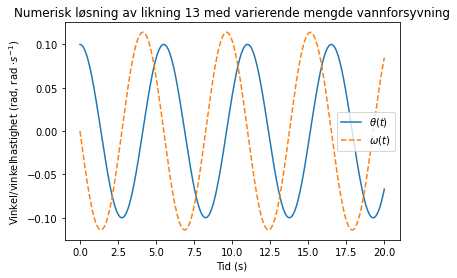

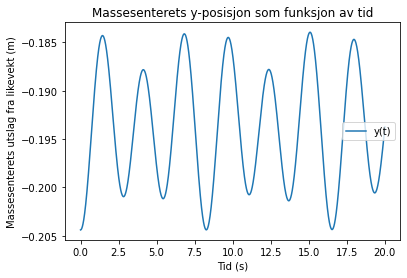

In [18]:
# Oppgave 2b

vy0 = 0             # startfart
y0 = yC0              # start posisjon til massesenter (med likevekt som referanse)
theta_0 = 0.1       # startvinkel
omega_0 = 0         # startvinkelfart
solution_0 = np.array([[theta_0,omega_0,y0,vy0]])

t, solutions = ode_solver(f_2a, t0, t_end, solution_0, 0.01, RK4)

# Plotter løsning fra 1d hvor vi tar hensyn til at mengden fortrengt vann (og dermed oppdriftskraften) varierer
plt.plot(t,solutions[:,0], label=r'$\theta(t)$')
plt.plot(t,solutions[:,1], '--', label=r'$\omega(t)$')
plt.legend(loc=5)
plt.title('Numerisk løsning av likning 13 med varierende mengde vannforsyvning')
plt.ylabel('Vinkel/vinkelhastighet (rad, rad $\cdot s^{-1}$)')
plt.xlabel('Tid (s)')
plt.show()


# Plotter y-posisjon
plt.plot(t,solutions[:,2])
plt.legend(['y(t)'],loc=5)
plt.title('Massesenterets y-posisjon som funksjon av tid')
plt.ylabel('Massesenterets utslag fra likevekt (m)')
plt.xlabel('Tid (s)')
plt.show()

Fra plottet av massesenterets y-posisjon ser vi en tydelig "bølgeform". Frekvensen ser ut til å være konstant, men amplituden er svært varierende, og dermed vil også mengden fortrengt vann variere. Ved kjøring av animasjonskoden tildelt prosjektet, kunne man tydelig se en fin "duppe bevegelse", og er noe som kan relateres til en båt som i virkeligheten ligger å dupper. Det er ikke det store utslaget, faktisk bare noen titalls centimeter, men nok til at det kan ses i animasjonskoden.

## Oppgave 2c)
Vi legger til mulig kantring av båten.

In [19]:
def ODE_solver_2c(x0,xend,y0,f,h,method):
    # Implenterer ny ode_solver for 2c
    
    y_num = np.array(y0)                           #Array for y verdier
    x_num = np.array([x0])                         #Array for x verdier
    
    while x_num[-1] < xend:                        #Kjører til vi har nådd xend
        if (x_num[-1]+h > xend):
            h = xend - x_num[-1]                   #Dersom x_num overskyter
          
        y_new = method(f,x_num[-1],y_num[-1],h)
        x_new = x_num[-1]+h
        
        ########
        theta_new = y_new[0]
        gamma_val = gamma(y_new[0],y_new[2])
        
        if np.abs(theta_new) > (np.pi-gamma_val)/2: #Sjekker om skipet har kantret til venstre eller høyre
            x_num = np.append(x_num,x_new)
            y_new = np.zeros(len(y_new))
            y_new[0] = theta_new                              
            y_num = np.concatenate((y_num,np.array([y_new])))
            
            sgn_theta = np.sign(theta_new)
            y_new = np.zeros(len(y_new))
            y_new[0] = np.pi/2 * sgn_theta
                
            #Fyller resterende verdier for simulasjonen, med tidsverdier, theta = +- 90 grader og resten av elementene lik null
            while x_num[-1] < xend:
                if (x_num[-1]+h > xend):
                    h = xend - x_num[-1]
                x_new = x_num[-1]+h
                x_num = np.append(x_num,x_new)
                y_num = np.concatenate((y_num,np.array([y_new])))
            
            return x_num,y_num
        
        #######
        
        x_num = np.append(x_num,x_new)
        y_num = np.concatenate((y_num,np.array([y_new])))
        
    return x_num, y_num

In [20]:
w = np.linspace(0,0.5,50)
max_omega = 1000
theta_0 = 0
y_0 = yC0
vy0 = 0

for w_val in w:
    y0 = np.array([[theta_0,w_val,y_0,vy0]])
    
    x_val,y_val = ODE_solver_2c(t0,t_end,y0,f_2a,h,RK4)

    if np.abs(y_val[-1][0]) == np.pi/2:
        max_omega = w_val
        break    

print(f'Minste verdi av vinkelhastigheten, omega før kantring er: {max_omega:.3f} rad/s')
print("Dette er for initialverdiene theta = 0, y_0 = y0c og vy0 = 0")
print("Bruker 4 desimaler, da vi har en steglengde mellom hver testverdi av omega på 1/100")

Minste verdi av vinkelhastigheten, omega før kantring er: 0.439 rad/s
Dette er for initialverdiene theta = 0, y_0 = y0c og vy0 = 0
Bruker 4 desimaler, da vi har en steglengde mellom hver testverdi av omega på 1/100


## Oppgave 2d)
I tillegg til kreftene i 2a skal vi nå se på hvordan en last som glir oppå dekk vil påvirke systemet. Denne lasten fører til at vi må gjøre en del endringer. For det første må vi inkludere massebidraget fra lasten. Dette vil føre til en endring i $\beta,A_0$ og diverse andre størrelser som inneholder massen til skipet. I tillegg må vi introdusere dreieimpulsbidraget fra lasten. Vi må også implementere hvordan lasten glir frem og tilbake ettersom at båten "gynger".

I 2d lar vi dekket være åpent. Det vil si at vi lar lasten ha mulighet til å gli av dekk, og isåfall ikke påvirke systemet etter dette.

$$\Sigma \tau = \tau_b + \tau_L = -F_B H sin(\theta) - m_L g cos(\theta) s_L = -A \sigma_0 g H sin(\theta) - m_L g cos(\theta) s_L $$

$$\Sigma F = F_G (y) + F_B (y) + F_L ^y(y) + F_L ^x (x) = -m g (y) + A \sigma_0 g (y) - m_L g cos^2(\theta) (y) + m_L g cos(\theta) sin(\theta) (x) $$

Vi deler $\Sigma F$ opp i to deler, $\Sigma F_x$ og $\Sigma F_y$. Dette er for å ha en ligning som bestemmer bevegelsen i x-retning og en for y-retning. Dette resulterer i følgende:

$$\Sigma F_x = F_L ^x = m_L g cos(\theta) sin(\theta)$$
$$\Sigma F_y = F_G (y) + F_B (y) + F_L ^y(y) = -m g + A \sigma_0 g - m_L g cos^2(\theta)$$


Videre bruker vi samme logikk som i 2b og 2c, hvor vi gjør disse tre ligningssettene om til 6 første ordens differensial ligninger.

$$\Sigma F_x = m \frac{d^2 R_x}{dt^2} = m \frac{d v_x}{dt} = m_L g cos(\theta) sin(\theta) $$

$$\implies \frac{dR_x}{dt} = v_x \;\;,\;\; \frac{dv_x}{dt} = \frac{m_L}{m} g cos(\theta) sin(\theta) $$


$$\Sigma F_y = m \frac{d^2 R_y}{dt^2} = m \frac{d v_y}{dt} = -m g + A \sigma_0 g - m_L g cos^2(\theta)$$

$$\implies \frac{dR_y}{dt} = v_y \;\;,\;\; \frac{dv_y}{dt} = -g + \frac{1}{m} A \sigma_0 g - \frac{m_L}{m} g cos^2(\theta)$$


$$\Sigma \tau = I_C \frac{d^2 \theta}{dt^2} = I_C \frac{d \omega}{dt} = -A \sigma_0 g H sin(\theta) - m_L g cos(\theta) s_L $$

$$\implies \frac{d\theta}{dt} = \omega \;\;,\;\; \frac{d\omega}{dt} = \frac{1}{I_C} (-A \sigma_0 g H sin(\theta) - m_L g cos(\theta) s_L)$$

I tillegg til disse 6 første ordens differensial ligningene, må vi også implementere hvordan klossen glir på underlaget. På klossen er det 2 krefter som virker. Den ene er normalkraften mellom kloss og skipsdekk, og den andre kraften er tyngdekraften til klossen. Ettersom at klossen alltid vil ha samme y-høyde som dekket i for samme s_L verdi, trenger vi ikke å bry oss om kreftene som er normale på skipsdekk planet. Dette gjør at vi ved hjelp av Newtons andre lov, kan modellere hvordan akselerasjonen til klossen varierer som en funksjon av $\theta$. En kjapp kladd på papir gir:

$$m_L \frac{d^2 s_L}{dt^2} = -m_L g sin(\theta)$$
$$\implies \frac{d^2 s_L}{dt^2} = -g sin(\theta)$$

$$\frac{d s_L}{dt} = v_L \;\;,\;\;\frac{d v_L}{dt} = -g sin(\theta)$$

Dette gir oss totalt 8 første ordens differensial ligninger som beskriver systemet. Ettersom at vi i 2d ikke inkluderer gjerder på skipet,
så fører dette til at noen av kreftene vil falle bort dersom lasten glir av. Dette implementeres i koden, og er ikke en kjempe
endring av det gjort så langt. I realiteten følger vi bare ligningene fra 2b dersom klossen faller av.

In [21]:
#Oppgave 2d

#alpha på formen [theta, omega, xc, vx, yc, vy, sL , vL]

def f_2d(x,alpha):
    
    #For lesbarhet
    theta = alpha[0]
    omega = alpha[1]
    xC = alpha[2]
    vxC = alpha[3]
    yC = alpha[4]
    vyC = alpha[5]
    sL = alpha[6]
    vL = alpha[7]
    
    
    gamma_val = gamma(theta,yC)
    
    theta_ut = omega
    omega_ut = 1/IC *(- A*sigma0*g*H*np.sin(theta)-mL*g*np.cos(theta)*sL)

    x_ut  = vxC
    vx_ut = mL/m * g* np.cos(theta) * np.sin(theta)
    
    y_ut  = vyC
    vy_ut = -g+A/m*sigma0*g-mL/m*g*(np.cos(theta))**2

    # dummy holder verdien 0 eller 1, den får verdien 0 dersom lasten faller av
    sL_ut = vL * dummy                
    vL_ut = - g * np.sin(theta) * dummy
    
    return np.array([theta_ut,omega_ut,x_ut,vx_ut,y_ut,vy_ut,sL_ut,vL_ut])

def ODE_solver_2d(x0,xend,y0,f,h,method):
    global A
    global IC
    global dummy  
    global mL


    
    y_num = np.array(y0)                         #Array for y verdier
    x_num = np.array([x0])                         #Array for x verdier
    
    while x_num[-1] < xend:                        #Kjører til vi har nådd xend
        if (x_num[-1]+h > xend):
            h = xend - x_num[-1]                   #Dersom x_num overskyter
    
        #Last faller av
        if np.abs(y_num[-1][6]) > R:
            mL = 0
            dummy = 0
            
        #Oppdatering av verdier
        gamma_val = gamma(y_num[-1][0],y_num[-1][4])
        IC = 0.5*m*R**2*(1-32/(9*np.pi**2))
        A = 0.5*R**2*(gamma_val-np.sin(gamma_val))

        
        y_new = method(f,x_num[-1],y_num[-1],h)
        x_new = x_num[-1]+h

        theta_new = y_new[0]
        gamma_val = gamma(y_new[0],y_new[4])
        
        #Kantring
        if np.abs(theta_new) > (np.pi-gamma_val)/2:
            x_num = np.append(x_num,x_new)
            y_new = np.zeros(len(y_new))
            y_new[0] = theta_new
            y_num = np.concatenate((y_num,np.array([y_new])))
            
            sgn_theta = np.sign(theta_new)
            y_new = np.zeros(len(y_new))
            y_new[0] = np.pi/2 * sgn_theta
                
            while x_num[-1] < xend:
                if (x_num[-1]+h > xend):
                    h = xend - x_num[-1]
                x_new = x_num[-1]+h
                x_num = np.append(x_num,x_new)
                y_num = np.concatenate((y_num,np.array([y_new])))
            
            return x_num,y_num
        
        
        
        x_num = np.append(x_num,x_new)
        y_num = np.concatenate((y_num,np.array([y_new])))
        
    return x_num, y_num


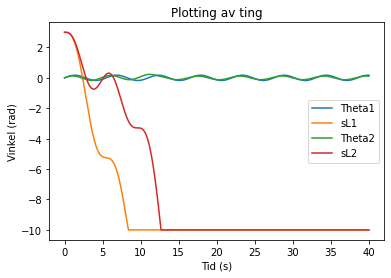

In [22]:
#Initialbetingelser og parametre
t0 = 0
t_end = 40

mL = 0.04*m
dummy = 1

x_0 = 0
vx0 = 0
y_0 = yC0
vy0 = 0
sL0 = 3       # Startposisjonen til boksen
vL0 = 0

IC = 0
A = 0

theta0 = 0
omega0 = 0.2



y0 = np.array([[theta0,omega0,x_0,vx0,y_0,vy0,sL0,vL0]])

IC = 0
A = 0
dummy = 1

mL = 0.001*m
x_vals1,y_vals1 = ODE_solver_2d(t0,t_end,y0,f_2d,h,RK4)
theta1 = y_vals1[:,0]
sL1 = y_vals1[:,6]


IC = 0
A = 0
dummy = 1

mL = 0.08*m
x_vals2,y_vals2 = ODE_solver_2d(t0,t_end,y0,f_2d,h,RK4)
theta2 = y_vals2[:,0]
sL2 = y_vals2[:,6]

# Plotting
plt.plot(x_vals1,theta1)
plt.plot(x_vals1,sL1)
plt.plot(x_vals2,theta2)
plt.plot(x_vals2,sL2)
plt.xlabel('Tid (s)')
plt.title('Plotting av ting')
plt.ylabel('Vinkel (rad)')
plt.legend(["Theta1","sL1","Theta2","sL2"])
plt.show()

Vi har valgt å gjøre det slik at dersom lasten faller av, så beholder vi lastens tidligere posisjon, men den fjernes ellers fra ligningene. Dette ser vi tydelig i plottet over, både for sL1 hvor mL = 0.001m og sL2 hvor mL = 0.08m. Dette vil ikke korrespondere med en konstant posisjon av sL når vi senere studerer skipet med gjerder, da vi en konstant posisjon indikere at lasten ligger i ro.

## Oppgave 2e)

I 2e implementerer vi at skipet har gjerder. Det vil si at lasten ikke faller av. Her er det gjort en antagelse om at energien lasten har forsvinner dersom den krasjer i et gjerde på endepunktene til skipsdekket. Dette kan forøvrig stemme fint for last med lav masse, noe vi kan tenke oss til at vi har mtp modellen.

In [23]:
# Oppgave 2e

def f_2e(x,y):
    gamma_val = gamma(y[0],y[4])
    
    theta_ut = y[1]
    omega_ut = 1/IC *(- A*sigma0*g*H*np.sin(y[0])-mL*g*np.cos(y[0])*y[6])

    x_ut  = y[3]
    vx_ut = mL/m * g* np.cos(y[0]) * np.sin(y[0])
    
    y_ut  = y[5]
    vy_ut = -g+A/m*sigma0*g-mL/m*g*(np.cos(y[0]))**2

    sL_ut = y[7]           
    vL_ut = - g * np.sin(y[0])
        
    return np.array([theta_ut,omega_ut,x_ut,vx_ut,y_ut,vy_ut,sL_ut,vL_ut])



def ODE_solver_2e(x0,xend,y0,f,h,method):
    global A
    global IC
    
    y_num = np.array(y0)                         #Array for y verdier
    x_num = np.array([x0])                       #Array for x verdier
    
    gamma_val0 = gamma(y_num[-1][0],y_num[-1][4])
    IC = 0.5*m*R**2*(1-32/(9*np.pi**2))
    
    A = 0.5*R**2*(gamma_val0-np.sin(gamma_val0))

    
    while x_num[-1] < xend:                        #Kjører til vi har nådd xend
        if (x_num[-1]+h > xend):
            h = xend - x_num[-1]                   #Dersom x_num overskyter
        
        y_new = method(f,x_num[-1],y_num[-1],h)
        x_new = x_num[-1]+h

        theta_new = y_new[0]
        gamma_val = gamma(y_num[-1][0],y_num[-1][4])
        sL_new = y_new[6]
        
        A = 0.5*R**2*(gamma_val-np.sin(gamma_val))
        
        if (np.abs(sL_new) >= R):
            y_new[6] = R*np.sign(sL_new)
            y_new[7] = 0
            
        
        #Kantring
        if np.abs(theta_new) > (np.pi-gamma_val)/2:
            x_num = np.append(x_num,x_new)
            y_new = np.zeros(len(y_new))
            y_new[0] = theta_new
            y_num = np.concatenate((y_num,np.array([y_new])))
            
            sgn_theta = np.sign(theta_new)
            y_new = np.zeros(len(y_new))
            y_new[0] = np.pi/2 * sgn_theta
                
            while x_num[-1] < xend:
                if (x_num[-1]+h > xend):
                    h = xend - x_num[-1]
                x_new = x_num[-1]+h
                x_num = np.append(x_num,x_new)
                y_num = np.concatenate((y_num,np.array([y_new])))
            
            return x_num,y_num
        
        
        
        x_num = np.append(x_num,x_new)
        y_num = np.concatenate((y_num,np.array([y_new])))
        
    return x_num, y_num

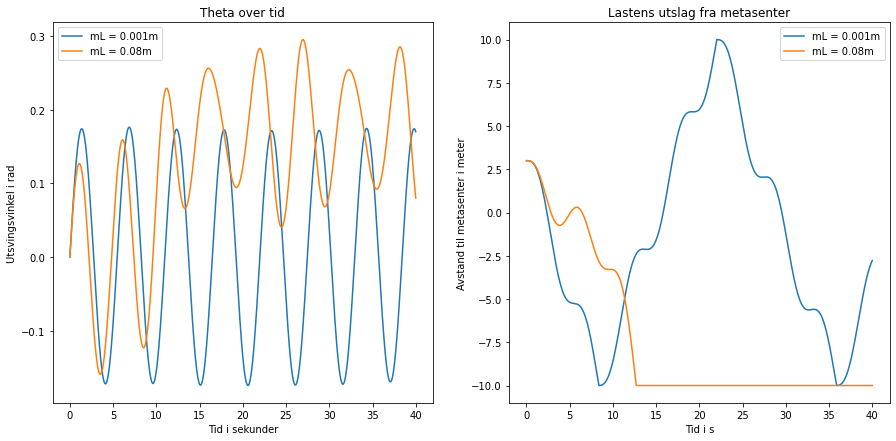

In [24]:
t0 = 0
tend = 40

mL = 0.001*m
x_vals1, y_vals1 = ODE_solver_2e(t0,tend,y0,f_2e,h,RK4)

mL = 0.08*m
x_vals2, y_vals2 = ODE_solver_2e(t0,tend,y0,f_2e,h,RK4)

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15,7))


ax1.title.set_text("Theta over tid")
ax1.set_xlabel("Tid i sekunder")
ax1.set_ylabel("Utsvingsvinkel i rad")

ax2.title.set_text("Lastens utslag fra metasenter")
ax2.set_xlabel("Tid i s")
ax2.set_ylabel("Avstand til metasenter i meter")

ax1.plot(x_vals1,y_vals1[:,0])
ax2.plot(x_vals1,y_vals1[:,6])

ax1.plot(x_vals2,y_vals2[:,0])
ax2.plot(x_vals2,y_vals2[:,6])

ax1.legend(["mL = 0.001m","mL = 0.08m"])
ax2.legend(["mL = 0.001m","mL = 0.08m"])
plt.show()



Det er ingen tvil om at lasten med mL = 0.08m har en mye større påvirkning på skipets dynamikk enn den lette lasten. For den lette lasten så er det tilsynelatende svært lite som skjer for vinkelutslaget theta, derimot for den tyngre lasten ser vi at skipet dras mer og mer til en side. Etter ca 13 sekunder beveger ikke skipet seg over negative vinkler lengre, og lasten blir dermed liggende intil det ene gjerdet på skipet. For den lette lasten ser vi at den ligger å slår frem og tilbake, med noen "pauser" i platåene vi ser i plottet over til høyre.

## Oppgave 2f og 2g

I disse to deloppgavene skal vi inkludere friksjonskrefter og harmoniske krefter. Vi ser ikke lengre på hvordan lasten påvirker skipets dynamikk. Dette kan i realiteten gjøres ved å sette mL lik null, men vi har valgt å for ryddighetens skyld fjerne krefter fra massens last fra ligningene.
Det følger da at ligningene (12) og (13) blir på formen:

$$\Sigma F = F_G + F_B + f + F_{w}$$

$F_G$ og $F_B$ virker i y retning, mens $f$ og $F_{w}$ virker i x retning. Vi velger derfor å dekomponere $\Sigma F$.

$$\Sigma F_x = f + F_{\omega} = -k_f R \gamma \omega + F_0 cos(\omega_w t)$$
$$\Sigma F_y = F_G + F_B = -mg + A \sigma_0 g $$

$$\Sigma \tau = \tau_B + \tau_f + \tau_w $$
$$ = -F_B H sin(\theta) + f ( y_C-(R(cos(\frac{\gamma}{2})-1))) $$
$$ = -A \sigma_0 g H sin(\theta) - k_f R \gamma \omega ( y_C-(R(cos(\frac{\gamma}{2})-1))) $$

Videre gjør vi slik som tidligere. Vi gjør disse tre ligningene om til 6 første ordens differensial ligninger. Da utledningen er tilnærmet identisk som i de andre oppgavene, hopper vi over mellom regninger og definerer systemligningene slik:

$$\frac{dR_x}{dt} = v_x \;\;,\;\; \frac{dv_x}{dt} = \frac{1}{m} (-k_f R \gamma \omega + F_0 cos(\omega_w t) )$$

$$\frac{dR_y}{dt} = v_y \;\;,\;\; \frac{dv_y}{dt} = g (\frac{A \sigma_0}{m}-1)$$

$$\frac{d\theta}{dt} = \omega \;\;,\;\; \frac{d\omega}{dt} = \frac{1}{I_C} (-A \sigma_0 g H sin(\theta) - k_f R \gamma \omega ( y_C-(R(cos(\frac{\gamma}{2})-1)))) $$



In [25]:
# Oppgave 2f, 2g

def ODE_solver_2fg(x0,xend,y0,f,h,method):
    global A
       
    y_num = np.array(y0)                         #Array for y verdier
    x_num = np.array([x0])                         #Array for x verdier
    
    while x_num[-1] < xend:                        #Kjører til vi har nådd xend
        if (x_num[-1]+h > xend):
            h = xend - x_num[-1]                   #Dersom x_num overskyter
        
        gamma_val = gamma(y_num[-1][0],y_num[-1][4])
        A = 0.5*R**2*(gamma_val-np.sin(gamma_val))
        
        y_new = method(f,x_num[-1],y_num[-1],h)
        x_new = x_num[-1]+h
        
        ########
        theta_new = y_new[0]
        gamma_val = gamma(y_num[-1][0],y_num[-1][4])
        
        if np.abs(theta_new) > (np.pi-gamma_val)/2:
            x_num = np.append(x_num,x_new)
            y_new = np.zeros(len(y_new))
            y_new[0] = theta_new
            y_num = np.concatenate((y_num,np.array([y_new])))
            
            sgn_theta = np.sign(theta_new)
            y_new = np.zeros(len(y_new))
            y_new[0] = np.pi/2 * sgn_theta
                
            while x_num[-1] < xend:
                if (x_num[-1]+h > xend):
                    h = xend - x_num[-1]
                x_new = x_num[-1]+h
                x_num = np.append(x_num,x_new)
                y_num = np.concatenate((y_num,np.array([y_new])))
            
            return x_num,y_num
        
        #######
        
        x_num = np.append(x_num,x_new)
        y_num = np.concatenate((y_num,np.array([y_new])))
        
    return x_num, y_num

def f_2fg(x,y):
    gamma_val = gamma(y[0],y[4])
    
    theta_ut = y[1]
    omega_ut = 1/IC *(-A*sigma0*g*H*np.sin(y[0])
                      -k_f*R*gamma_val*y[1]*(y[4]-(R*(np.cos(gamma_val/2)-1))))
    
    x_ut = y[3]
    vx_ut = 1/m * (-k_f*R*gamma_val*y[1]+F_0 * np.cos(omega_w*x))
    
    y_ut = y[5]
    vy_ut = g*(A*sigma0/m - 1)

    
    return np.array([theta_ut,omega_ut,x_ut,vx_ut,y_ut,vy_ut])

In [26]:
theta0 = 0
omega0 = 0.4
x_0 = 0
vx0 = 0
y_0 = yC0
vy0 = 0

A = 0         #OBS: verdi er bare initialisert, ekte verdi gis i ode_solver
IC = 0.5*m*R**2*(1-32/(9*np.pi**2))
F_0 = 0       # I 2f ser vi ikke på den harmoniske kraften
omega_w = 0


k_f = 100
y0 = np.array([[theta0,omega0,x_0,vx0,y_0,vy0]])
x_kf1,y_kf1 = ODE_solver_2fg(t0,tend,y0,f_2fg,h,RK4)

k_f = 1000
y0 = np.array([[theta0,omega0,x_0,vx0,y_0,vy0]])
x_kf2,y_kf2 = ODE_solver_2fg(t0,tend,y0,f_2fg,h,RK4)

k_f = 5000
y0 = np.array([[theta0,omega0,x_0,vx0,y_0,vy0]])
x_kf3,y_kf3 = ODE_solver_2fg(t0,tend,y0,f_2fg,h,RK4)

k_f = 10000
y0 = np.array([[theta0,omega0,x_0,vx0,y_0,vy0]])
x_kf4,y_kf4 = ODE_solver_2fg(t0,tend,y0,f_2fg,h,RK4)

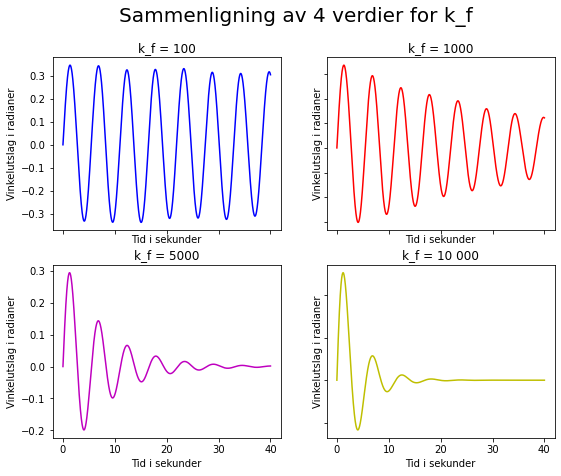

In [27]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (9,7))

fig.suptitle("Sammenligning av 4 verdier for k_f",size =20)

for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlabel("Tid i sekunder")
    ax.set_ylabel("Vinkelutslag i radianer")
    
    
ax1.set_title("k_f = 100")
ax2.set_title("k_f = 1000")
ax3.set_title("k_f = 5000")
ax4.set_title("k_f = 10 000")
ax1.plot(x_kf1,y_kf1[:,0],"b")
ax2.plot(x_kf2,y_kf2[:,0],"r")
ax3.plot(x_kf3,y_kf3[:,0],"m")
ax4.plot(x_kf4,y_kf4[:,0],"y")

plt.show()

Plottet over viser enormt godt hvor stor friksjonskoeffesienten har på skipetsdynamikk. For lave verdier av k_f, som rundt 100, ser vi tilnærmet ingen påvirkning. Ser man godt etter kan man se at amplituden blir litt mindre over tid, men ikke kjemperedusert. For høyere k_f verdier slik som k_f = 1000, ser vi en tydelig "nedbremsnings" trend. Vi valgte og å ta med verdier av k_f = 5000 og k_f = 10000. Dersom man noen gang har sittet i en halvstor robåt, kan man vel kanskje relatere mer til disse grafene enn for k_f = 100 og k_f = 1000.

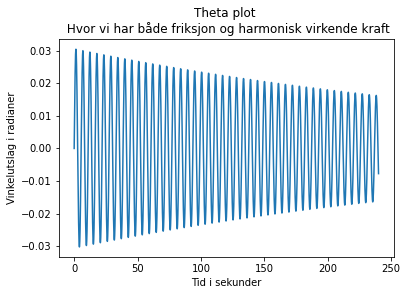

In [28]:
#Oppgave 2g
#Initialbetingelser og parametre

t0 = 0
t_end = 240
h = 0.01

theta0 = 0
omega0 = np.radians(2)
x_0 = 0
vx0 = 0
y_0 = yC0
vy0 = 0

IC = 0.5*m*R**2*(1-32/(9*np.pi**2))
F_0 = 0.625*m*g
k_f = 100
omega_w = 0.93*np.sqrt(m*g*H/IC)


y0 = np.array([[theta0,omega0,x_0,vx0,y_0,vy0]])
x_vals,y_vals = ODE_solver_2fg(t0,t_end,y0,f_2fg,h,RK4)

# Plotting..
plt.title("Theta plot \n Hvor vi har både friksjon og harmonisk virkende kraft")
plt.xlabel("Tid i sekunder")
plt.ylabel("Vinkelutslag i radianer")
plt.plot(x_vals,y_vals[:,0])
plt.show()

Fra figuren over ser vi at den harmoniske drivkraften, med en frekvens svært lik egenfrekvensen til skipet, klarer å holde vuggingen igang, tross friksjonskraften. Vi får her en oscillasjon som moduleres og avgrenses av friksjonen, men samtidig drives av en harmonisk virkende kraft. Det er ikke urimelig å anta fra plottet over at denne vuggingen vil konvergere over tid. 

## Oppgave 2h)



I problem 2h har vi valgt å bruke Euler-Cromer, som er en forbedret versjon av Eulers metode. Dette er en semi-implisitt metode, som bruker hastighet i+1 til å beregne posisjon for i+1. Dette kan høres litt merkelig ut, så jeg legger ved en enkel implemetasjon under.

$$\frac{dx}{dt} = f(t,v)$$
$$\frac{dv}{dt} = g(t,x)$$

Da gir metoden:

$$v_{n+1} = v_n + g(t_n,x_n) \triangle t$$
$$x_{n+1} = x_n + f(t_n,v_{n+1}) \triangle t$$

Det er ingen tvil om at en førsteordens metode, ikke vil nå RK4 til anklene når det gjelder presisjon, men det kan være svært interessant å se om vi ser en tydelig forbedring fra Eulers enklere metode. Et problem vi observerte med Euler i oppgave 1h)(første plott) var at amplituden øker med tid. Dette skyldes at Eulers metode ikke tar hensyn til energibevaring, men dette gjør Euler Cromer! Vi forventer derfor at Euler Cromer oppfører seg bedre enn Euler.

### Problemstilling

Den 10. august 1628 fikk TVA (red.anm.; Time Variance Authority fra Disney+ serien "Loki") det enormt travelt, da det hadde slått seg ut en ny tidsgren. I denne nye parallelle tidslinjen sank ikke Vasa skipet 1300m unna havnen i Stockholm, men sank før de hadde fått tid til å seile fra kai. Det som hadde skjedd, var at ved lavvann, hadde de førtøyd båten med et stramt tau. Dette førte til at etter det ble høyvann, så ble skipet holdt nede på den ene siden, noe som førte til en helningsvinkel. For å gjøre vondt værre, så hadde de selvsagt lastet et tungt objekt, på den andre ytter enden av skipet, som faktisk var stroppet svært godt! Når skipet skulle seile avgårde, måtte de kutte tauene som holdte skipet nede og dette førte til kantring allerede ved kai!


Vi gjør noen dristige antagelser. For det første er det ikke særlig mye å finne på tidevannstabellen over Stockholm  10.august 1628, vi antar derfor at forskjellen i vannstand ved lavvann og høyvann er tilsvarende som Kartverket oppgir for Oslo vannstandmåler i august 2022. Dette gir oss en differanse på ca 50cm. I tillegg antar vi at skipet ligger i likevekt, så massesenterets høyde fra vannlinja vil være y0C, som vi har benyttet i tidligere kode. Vi antar og at lasten er så liten at dens påvirkning av likevekten og fortrengt vann er neglesjerbar. Ettersom at skipet sannsynligvis nettopp har blitt bunnsmurt, antar vi neglesjerbar friksjon. Det vil dermed si at vi kan bruke systemet fra 2d, med noen endringer.

Det vi da undrer på er; hvor tung var egentlig lasten, med tanke på at skipet kantret allerede på første svingning? Er dette en last med en slik masse at vi kan neglesjere lastens bidrag på fortrengt vann og likevektsparametre?


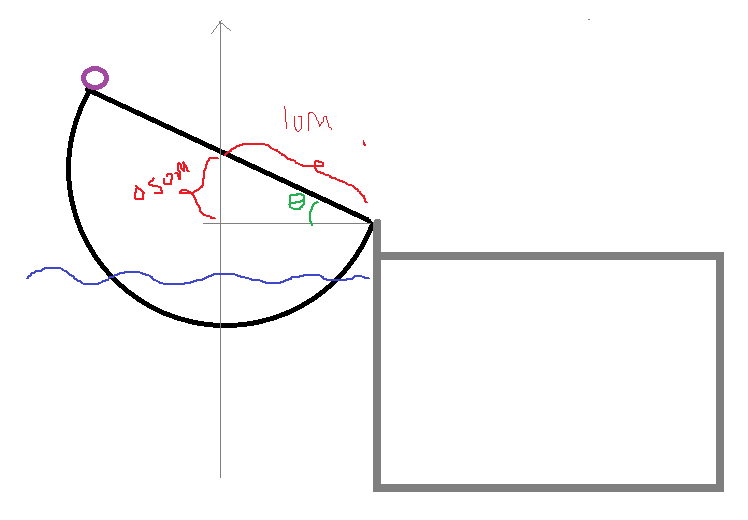

Figuren over illustrerer initial tilstanden for skipet. Vi antar at metasenteret ligger 50cm over den delen av dekk som er bundet fast til kaia. Den integnede vinkelen vil, på grunn av formlikhet, være lik vinkelen mellom normalen til dekk og y-akse. Dette gir en $\theta_0 = sin^{-1}(0.5m/10m)$, som tilsvarer omlag 0.05 radianer. Den lilla sirkelen er lastens posisjon.

In [29]:
#Implementasjon vha RK4
#alpha på formen [theta, omega, xc, vx, yc, vy, sL , vL]
def f_2h(x,alpha):
    #For lesbarhet
    theta = alpha[0]
    omega = alpha[1]
    xC = alpha[2]
    vxC = alpha[3]
    yC = alpha[4]
    vyC = alpha[5]
    
    gamma_val = gamma(theta,yC)
    
    theta_ut = omega
    omega_ut = 1/IC *(- A*sigma0*g*H*np.sin(theta)-mL*g*np.cos(theta)*sL)

    x_ut  = vxC
    vx_ut = mL/m * g* np.cos(theta) * np.sin(theta)
    
    y_ut  = vyC
    vy_ut = -g+A/m*sigma0*g-mL/m*g*(np.cos(theta))**2
    
    return np.array([theta_ut,omega_ut,x_ut,vx_ut,y_ut,vy_ut])

def ODE_solver_2h(x0,xend,y0,f,h,method):
    global A
    
    y_num = np.array(y0)                           #Array for y verdier
    x_num = np.array([x0])                         #Array for x verdier

    while x_num[-1] < xend:                        #Kjører til vi har nådd xend
        if (x_num[-1]+h > xend):
            h = xend - x_num[-1]                   #Dersom x_num overskyter

        gamma_val = gamma(y_num[-1][0],y_num[-1][4])
        A = 0.5*R**2*(gamma_val-np.sin(gamma_val))
        
        y_new = method(f,x_num[-1],y_num[-1],h)
        x_new = x_num[-1]+h

        theta_new = y_new[0]
        gamma_val = gamma(y_new[0],y_new[4])
        
        #Kantring
        if np.abs(theta_new) > (np.pi-gamma_val)/2:
            x_num = np.append(x_num,x_new)
            y_new = np.zeros(len(y_new))
            y_new[0] = theta_new
            y_num = np.concatenate((y_num,np.array([y_new])))
            
            sgn_theta = np.sign(theta_new)
            y_new = np.zeros(len(y_new))
            y_new[0] = np.pi/2 * sgn_theta
                
            while x_num[-1] < xend:
                if (x_num[-1]+h > xend):
                    h = xend - x_num[-1]
                x_new = x_num[-1]+h
                x_num = np.append(x_num,x_new)
                y_num = np.concatenate((y_num,np.array([y_new])))
            
            return x_num,y_num
        
        
        
        x_num = np.append(x_num,x_new)
        y_num = np.concatenate((y_num,np.array([y_new])))
        
    return x_num, y_num


Lastens masse ved kantring =  7452.0


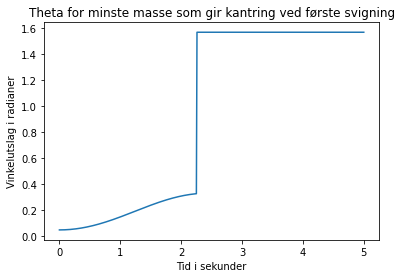

In [30]:
#Simulasjon vha RK4
t0 = 0
tend = 5

sL = -10
omega_0 = 0
theta_0 = np.arcsin(1/20)
x_0 = 0
vx0 = 0
y_0 = yC0
vy0 = 0

y0 = np.array([[theta_0,omega_0,x_0,vx0,y_0,vy0]])

mL_vals = np.linspace(7440,7460,21) #Litt prøving og feiling gav dette som et passende intervall.

mL_kantre = 0

IC = 0.5*m*R**2*(1-32/(9*np.pi**2))
mL = 7450
for mL in mL_vals:
    A  = 0 #Oppdateres ved kjøring
    x_vals,y_vals = ODE_solver_2h(t0,tend,y0,f_2h,h,RK4)
    
    if np.abs(y_vals[-1][0]) == np.pi/2:
        mL_kantre = mL
        break

print("Lastens masse ved kantring = ",mL)


plt.figure()
plt.title("Theta for minste masse som gir kantring ved første svigning")
plt.xlabel("Tid i sekunder")
plt.ylabel("Vinkelutslag i radianer")
plt.plot(x_vals,y_vals[:,0])
plt.show()

Vi skal nå kjøre samme simulasjonen, vha Euler-cromer!

In [31]:
#[[theta_0,omega_0,x_0,vx0,y_0,vy0]]
def euler_cromer(f,t,y,h):
    v = y
    temp = v + h*f(t,y)
    
    v[1] = temp[1]
    v[3] = temp[3]
    v[5] = temp[5]
    
    y_new = y + h*f(t,v)
    y_new[1] = v[1]
    y_new[3] = v[3]
    y_new[5] = v[5]
    
    return y_new   

Lastens masse ved kantring =  7461.0


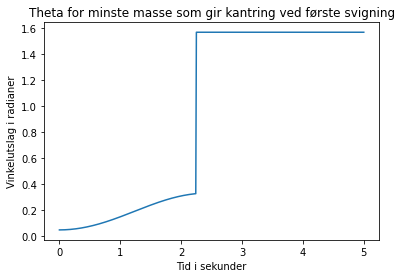

In [32]:
#Simulasjon vha Euler-cromer
t0 = 0
tend = 5

sL = -10
omega_0 = 0
theta_0 = np.arcsin(1/20)
x_0 = 0
vx0 = 0
y_0 = yC0
vy0 = 0

y0 = np.array([[theta_0,omega_0,x_0,vx0,y_0,vy0]])

mL_vals = np.linspace(7450,7470,21) #Litt prøving og feiling gav dette som et passende intervall.

mL_kantre = 0

IC = 0.5*m*R**2*(1-32/(9*np.pi**2))

for mL in mL_vals:
    A  = 0 #Oppdateres ved kjøring
    x_vals,y_vals = ODE_solver_2h(t0,tend,y0,f_2h,h,euler_cromer)
    
    if np.abs(y_vals[-1][0]) == np.pi/2:
        mL_kantre = mL
        break


print("Lastens masse ved kantring = ",mL)

plt.figure()
plt.title("Theta for minste masse som gir kantring ved første svigning")
plt.xlabel("Tid i sekunder")
plt.ylabel("Vinkelutslag i radianer")
plt.plot(x_vals,y_vals[:,0])
plt.show()

### Kommentarer på problemstilling

For å slippe å bruke uendelig mange verdier av mL, ble det gjort en avgrensning vha den enkle metoden "prøv og feil". Dette gav to halvrepresentable intervaller, hvor vi fikk testet for 21 ulike verdier av mL for de to ulike løserene. De to ulike metodene gir ikke store forskjeller, faktisk bare 9kg. Ettersom at vi forventer en høyere prestasjon av RK4 er dette ikke en urimelig feilmargin, da 9kg på over 7400kg er nærmere en promille! Det viser seg altså at Euler-Cromer klarte seg svært bra i denne testen, og dersom vi sammenligner plottene, er det svært vanskelig å se noen stor forskjell, dette ligger isåfall dypt gjemt i detaljene. 

Derimot må vi nok se på rimeligheten ved antagelsene og resultatene våre. For det første, var vasaskipet utstyrt med kanoner på omlag 3 tonn per stykk. Her antar vi at kanonstørrelsen var lik kanoenene som fantes på denne tiden. Dersom vi skal ha 7.5 tonn med last per lengde meter på den ene siden av skipet, tilsvarer dette rundt 2.5 kanon per lengdemeter, noe som fint kunne vært korrekt, ettersom at kanonene var fordelt over 2 etasjer. Derimot er det urimelig å anta at disse kanonene ikke ville hatt en påvirkning av skipets tyngdepunkt og fortregning av vann. Dersom vi dividerer lastens masse (ca 7500kg) på skipets masse (ca 80 000kg) ender vi med ca 9.5%. Dette er så høy en relativ masse, at det uten tvil ville hatt en viss invirkning på systemet.

# Avslutning

Vi har gjennom dette prosjektet studert diverse numeriske metoder for løsning av differensial ligninger. Dette har gitt gode resultater, både når vi har sammenlignet med analytiske løsninger, men også når vi studerer hvor realistiske resultatene er. Vi har sett på hvordan skipets dynamikk endres dersom vi har lagt til flere krefter i ligningene, noe som har vært tydelig i alle plott vi har gjort av systemene. 

Med dette i bakhodet, kan vi si at vi lærte mye av dette prosjektet, og at vi fikk et greit innblikk i hvordan vi ved hjelp av programmering kan få gode tilnærmelser på avanserte problemer!